In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Introduction
Breast Cancer is the second most common cancer in women after skin cancer. If left unchecked, the tumours can spread throughout the body and become fatal. In 2022, there were 2.3 million women diagnosed with breast cancer and 670,000 deaths globally. Breast cancer occurs in every country of the world in women at any age after puberty but with increasing rates in later life. Early detection of breast cancer is crucial for successful treatment and improving survival rates.

This project utilizes machine learning to predict a patients likelood of surviving Breast Cancer.

## Understanding the Data
The dataset contains data for over 400 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:

Patient_ID: ID of the patient

Age: Age of the patient

Gender: Gender of the patient

Protein1, Protein2, Protein3, Protein4: expression levels

Tumor_Stage: Breast cancer stage of the patient

Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma

ER status: Positive/Negative

PR status: Positive/Negative

HER2 status: Positive/Negative

Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

DateofSurgery: The date of Surgery

DateofLast_Visit: The date of the last visit of the patient

Patient_Status: Alive/Dead


 ## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVC

In [4]:
data = pd.read_csv("BRCA.csv")
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

## Data Cleaning

In [5]:
#Check for null values
print(data.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [6]:
#Remove null values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [7]:
#Check if nulls are removed
data.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

## Data Exploration

In [8]:
data.Gender.describe()

count        317
unique         2
top       FEMALE
freq         313
Name: Gender, dtype: object

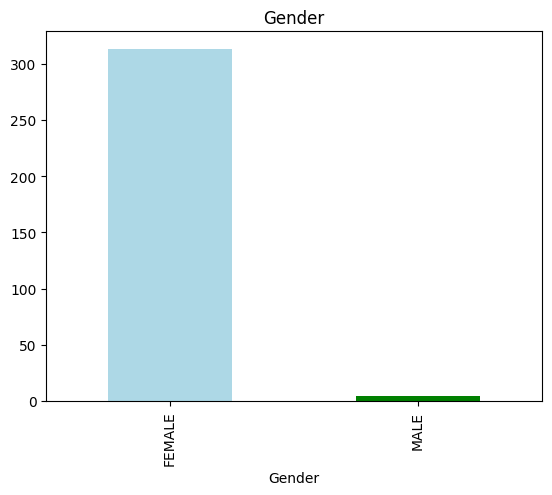

In [9]:
# Create a bar chart with the counts of two different genders
data.Gender.value_counts().plot(kind='bar',title='Gender', color= ['lightblue', 'green'])
plt.show()

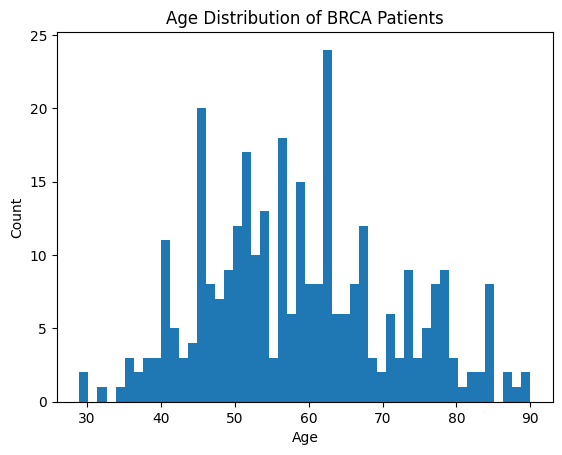

In [10]:
data['Age'].hist(bins = 50, grid = False)
plt.xlabel(xlabel = "Age")
plt.ylabel(ylabel = "Count")
plt.title("Age Distribution of BRCA Patients")
plt.show()

Appears to be a normal distribution of Age groups in the dataset. Most of population is in 45-55 year old age group.

In [11]:
# Get the counts of the different tumor stages
tumour_stage_counts = data["Tumour_Stage"].value_counts()

# Get the names and counts of the different tumor stages
tumour_stages = tumour_stage_counts.index
tumour_counts = tumour_stage_counts.values

# Create a pie chart with the counts of the different tumor stages
fig = px.pie(data,
             values=tumour_counts,
             names=tumour_stages,
            color=tumour_stages,
             color_discrete_map={"Stage I": "red", "Stage II": "blue", "Stage III": "green", "Stage IV": "purple"},
             hole=0.5,
             title="Tumour Stages of Patients")

# Add a legend to the chart
fig.update_layout(legend_title="Tumour Stages", width=800, height=600)

# Add labels to the pie chart sectors
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the chart
fig.show()

In [12]:
table=pd.crosstab(data['Tumour_Stage'],data['Gender'])
table

Gender,FEMALE,MALE
Tumour_Stage,,
I,60,0
II,177,3
III,76,1


In [13]:
# Get the counts of the different histology types
histology_counts = data["Histology"].value_counts()

# Get the names and counts of the different histology types
histology_types = histology_counts.index
histology_values = histology_counts.values

# Create a pie chart with the counts of the different histology types
fig = px.pie(data,
             values=histology_values,
             names=histology_types,
             color=histology_types,
             color_discrete_map={"Type 1": "red", "Type 2": "blue", "Type 3": "green", "Type 4": "purple"},
             hole=0.5,
             title="Histology of Patients")

# Add a legend to the chart
fig.update_layout(legend_title="Histology Types")

# Add labels to the pie chart sectors
fig.update_traces(textposition='inside', textinfo='percent+label')

# Adjust the size of the chart
fig.update_layout(width=800, height=600)

# Show the chart
fig.show()

### Invasive Ductal Carcinoma
Invasive ductal carcinoma (IDC), also known as infiltrating ductal carcinoma, is a type of breast cancer that starts in the milk ducts of the breast and moves into nearby tissue. In time, IDC may spread (metastasize) through the lymph nodes or bloodstream to other areas of the body.

### Mucinous Carcinoma
In mucinous carcinoma, cancer cells form in mucin, the main component of mucus. Mucins are proteins that help with the function of healthy cells. In mucinous carcinoma, the mucin around cancer cells becomes part of the tumor. Mucinous carcinoma can occur anywhere in your body, but it’s most common in your breast.

### Invasive Lobular Carcinoma
Invasive lobular carcinoma, also known as infiltrating lobular carcinoma, begins in the milk-producing glands (lobules) of the breast. As an invasive type of cancer, ILC has spread beyond its original tumor site. Over time, ILC may become metastatic breast cancer.

## Look at the values of ER status, PR status, and HER2 status of the patients:

In [14]:
# Get the counts of patients with different ER statuses
er_counts = data["ER status"].value_counts()

# Print the counts of patients with different ER statuses
print("ER Status Counts:")
for status, count in er_counts.items():
    print(f"{status}: {count}")

# Get the counts of patients with different PR statuses
pr_counts = data["PR status"].value_counts()

# Print the counts of patients with different PR statuses
print("\nPR Status Counts:")
for status, count in pr_counts.items():
    print(f"{status}: {count}")

# Get the counts of patients with different HER2 statuses
her2_counts = data["HER2 status"].value_counts()

# Print the counts of patients with different HER2 statuses
print("\nHER2 Status Counts:")
for status, count in her2_counts.items():
    print(f"{status}: {count}")

ER Status Counts:
Positive: 317

PR Status Counts:
Positive: 317

HER2 Status Counts:
Negative: 288
Positive: 29


In [15]:
# Get the counts of the different surgery types
surgery_counts = data["Surgery_type"].value_counts()

# Get the names and counts of the different surgery types
surgery_types = surgery_counts.index
surgery_values = surgery_counts.values

# Create a pie chart with the counts of the different surgery types
fig = px.pie(data,
             values=surgery_values,
             names=surgery_types,
             color=surgery_types,
             color_discrete_map={"Surgery Type 1": "red", "Surgery Type 2": "blue", "Surgery Type 3": "green", "Surgery Type 4": "purple"},
             hole=0.5,
             title="Type of Surgery of Patients")

# Add a legend to the chart
fig.update_layout(legend_title="Surgery Types")

# Add labels to the pie chart sectors
fig.update_traces(textposition='inside', textinfo='percent+label')

# Adjust the size of the chart
fig.update_layout(width=800, height=600)

# Show the chart
fig.show()

## Transform data to categorical figures:

In [16]:
# Map tumour stage to numerical values
tumour_stage_map = {"I": 1, "II": 2, "III": 3}
data["Tumour_Stage"] = data["Tumour_Stage"].replace(tumour_stage_map)

# Map histology to numerical values
histology_map = {"Infiltrating Ductal Carcinoma": 1, "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3}
data["Histology"] = data["Histology"].replace(histology_map)

# Map ER status to numerical values
er_map = {"Positive": 1}
data["ER status"] = data["ER status"].replace(er_map)

# Map PR status to numerical values
pr_map = {"Positive": 1}
data["PR status"] = data["PR status"].replace(pr_map)

# Map HER2 status to numerical values
her2_map = {"Positive": 1, "Negative": 2}
data["HER2 status"] = data["HER2 status"].replace(her2_map)

# Map gender to numerical values
gender_map = {"MALE": 0, "FEMALE": 1}
data["Gender"] = data["Gender"].replace(gender_map)

# Map surgery type to numerical values
surgery_map = {"Other": 1, "Modified Radical Mastectomy": 2, "Lumpectomy": 3, "Simple Mastectomy": 4}
data["Surgery_type"] = data["Surgery_type"].replace(surgery_map)

# Drop any rows with missing values
data.dropna(inplace=True)

# Print the first few rows of the updated dataframe
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,06-May-17,27-Jun-19,Dead


## Breast Cancer Survival Prediction Model

In [21]:
#Splitting data
x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4',
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status',
                   'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

In [22]:
model = SVC()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC()

In [25]:
# Evaluate performance on test set
score = model.score(X_test, y_test)
print("Accuracy on test set:", score)

# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))


Accuracy on test set: 0.8125
['Alive']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

